# GPU-accelerated demo using nx-cugraph
In this demo, turning the following environment variable on and off will transparently dispatch many functions to the GPU including:
* [nx.forceatlas2_layout](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.components.connected_components.html#networkx.algorithms.components.connected_components)
* [nx.connected_components](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.layout.forceatlas2_layout.html#networkx.drawing.layout.forceatlas2_layout)

The demo currently shows a significant speed-up in the drawing algorithm but also some penalties when falling back to a CPU algorithm. Some GPU algorithms like [nx.betweenness_centrality](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.betweenness_centrality.html#networkx.algorithms.centrality.betweenness_centrality) also show slowdowns with respect to their CPU counterparts in the publications incidence graph.

In [5]:
%env NX_CUGRAPH_AUTOCONFIG=True

import networkx as nx
nx.config.warnings_to_ignore.add("cache")

from src.nx_hif import *
from src.nx_hif.hif import *
from src.nx_hif.readwrite import *

env: NX_CUGRAPH_AUTOCONFIG=True


In [6]:
V, E, I = read_hif("data/publications.hif.json")

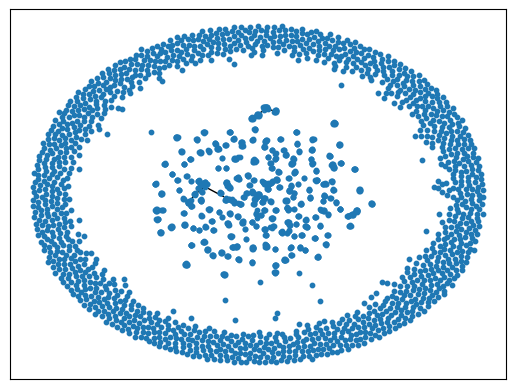

In [7]:
pos = nx.forceatlas2_layout(I)
nx.draw_networkx(I, pos=pos, with_labels=False, node_size=10)

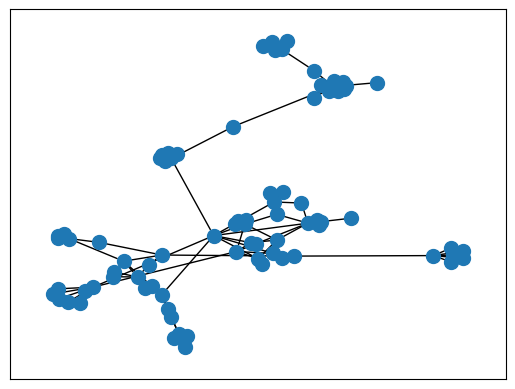

In [8]:
largest_component = max(nx.connected_components(I), key=len)
largest_subgraph = I.subgraph(largest_component).copy()
pos2 = nx.forceatlas2_layout(largest_subgraph)
nx.draw_networkx(largest_subgraph, pos=pos2, with_labels=False, node_size=100)